In [9]:
import os
import json
from collections import defaultdict
import matplotlib.pyplot as plt

**Import binding energies calculated with revPBE, rVV10, and vDW-DF2**

In [10]:
with open(os.path.join('data', 'structures_df2_calc_with_bands_be.json')) as fhandle:
        df2 = json.load(fhandle)
with open(os.path.join('data', 'structures_rvv10_calc_with_bands_be.json')) as fhandle:
        rvv10 = json.load(fhandle)
with open(os.path.join('data', 'structures_revpbe_calc_with_bands_be.json')) as fhandle:
        revpbe = json.load(fhandle)

In [11]:
df2['41a0956f-91be-469e-8e98-58188e746301']

{'cell': [[16.8562741837162, 0.0, 0.0],
  [0.0, 7.22133640167749, 0.0],
  [0.0, 0.0, 6.91643636329717]],
 'volume': 841.902015349062,
 'binding_energy': {'relevant_dimension_of_highest_dimensionality_substructure': 121.724826359526,
  'binding_energy_per_substructure': -2.35420277139929,
  'number_of_atoms_in_bulk': 32,
  'uuid': '2964aca5-ac8d-4cc8-bf76-d9ca5c439fec',
  'delta_min': 0.7,
  'number_of_highest_dimensionality_substructures_in_bulk': 1,
  'sub_structure_spg': ['Pmma (51)'],
  'relevant_dimension_units': 'ang^2',
  'transformation_mat': [[0.0, 1.0, 0.0], [1.0, 0.0, 0.0], [0.0, 0.0, 1.0]],
  'energy_units': 'eV',
  'sub_structure_dim': [2],
  'energy_bulk': -51375.7611599322,
  'sub_structure_formulas': ['Br22Nb8Rb2']},
 'uuid_pw': 'd7ec50df-0de7-4ee6-95dd-0d9cdd0ad19b'}

***For some structures, we have binding energies with both rVV10 and vDW-DF2:***

In [12]:
    binding_energies_raw = {}
    for uuid_key in set(df2).union(rvv10):
        subdict = {}
        df2_binding_energy = df2.get(uuid_key, {}).get('binding_energy', {})
        if df2_binding_energy:
            subdict['df2'] = df2_binding_energy
        rvv10_binding_energy = rvv10.get(uuid_key, {}).get('binding_energy', {})
        if rvv10_binding_energy:
            subdict['rvv10'] = rvv10_binding_energy
        if subdict:
            binding_energies_raw[uuid_key] = subdict
    
    print("Found {} entries, these should be set D of the Mounet paper, maybe there is one structure that has been 'removed' by hand".format(
        len(binding_energies_raw)))

    binding_energies = {}
    for key, val in binding_energies_raw.items():
        subdict = defaultdict(dict)
        subdict['sub_structure_formulas'] = []
        for method in ['rvv10', 'df2']:
            try:
                # meV / ang^2, with positive sign
                subdict[method] = ( -1000. *
                    val[method]['binding_energy_per_substructure']/
                    val[method]['relevant_dimension_of_highest_dimensionality_substructure'])
                subdict['sub_structure_formulas'] += val[method]['sub_structure_formulas'] # Might need to skip the non-2D ones
            except KeyError as exc:
                # Binding energy not computed with this method
                if str(exc) != "'{}'".format(method):
                    print(str(exc), method)
                    raise
        subdict['sub_structure_formulas'] = sorted(set(subdict['sub_structure_formulas']))
        binding_energies[key] = dict(subdict.items())
    BN_structures = {k: v for k, v in binding_energies.items() if 'BN' in v['sub_structure_formulas']}
    print("Structures containing BN:")
    print(json.dumps(BN_structures, indent=2))

Found 2663 entries, these should be set D of the Mounet paper, maybe there is one structure that has been 'removed' by hand
Structures containing BN:
{
  "967b8f61-56d9-4082-8e85-cb834f47d8ac": {
    "sub_structure_formulas": [
      "BN"
    ],
    "rvv10": 25.157073954185357,
    "df2": 20.298162003656397
  },
  "f7e2ff32-27ed-4c89-9c3c-4acbaffbb897": {
    "sub_structure_formulas": [
      "BN"
    ],
    "rvv10": 25.073826446277092,
    "df2": 20.06262819882249
  },
  "8f2e38e9-01d5-4208-adaf-daa461ac8139": {
    "sub_structure_formulas": [
      "BN"
    ],
    "rvv10": 24.43280244214127,
    "df2": 19.38081606716093
  }
}


In [13]:
binding_energies_raw['5152efb8-1470-4d3b-999f-aac46e5c6758']

{'df2': {'relevant_dimension_of_highest_dimensionality_substructure': 26.051195073268,
  'binding_energy_per_substructure': -0.546954113597167,
  'number_of_atoms_in_bulk': 14,
  'uuid': '954b3ada-7a5a-41a5-af1b-19cafcb4258e',
  'delta_min': 0.6,
  'number_of_highest_dimensionality_substructures_in_bulk': 1,
  'sub_structure_spg': ['P-1 (2)'],
  'relevant_dimension_units': 'ang^2',
  'transformation_mat': [[1.0, -1.0, 0.0],
   [-0.0, -0.0, 1.0],
   [0.0, -1.0, -0.0]],
  'energy_units': 'eV',
  'sub_structure_dim': [2],
  'energy_bulk': -54233.1567725866,
  'sub_structure_formulas': ['Bi4O8Sr2']},
 'rvv10': {'relevant_dimension_of_highest_dimensionality_substructure': 26.6315120874066,
  'binding_energy_per_substructure': -0.792859168097493,
  'number_of_atoms_in_bulk': 14,
  'uuid': '78e36a32-3735-438b-955c-64a54e4757fb',
  'delta_min': 0.6,
  'number_of_highest_dimensionality_substructures_in_bulk': 1,
  'sub_structure_spg': ['P-1 (2)'],
  'relevant_dimension_units': 'ang^2',
  'trans

***Let's see how many substructures we have:***

In [14]:
import itertools

In [15]:
all_sub_structure_formulas = [binding_energies[key]['sub_structure_formulas'] for key in binding_energies.keys()]

In [16]:
len(all_sub_structure_formulas)

2663

***All the sub-structures aren't unique:***

In [17]:
all_sub_structure_formulas.sort()
all_sub_structure_formulas = list(num for num,_ in itertools.groupby(all_sub_structure_formulas))

In [18]:
len(all_sub_structure_formulas)

2388

***In total, we have 2388 unique sub-structures:***

In [19]:
sub_structure_binding = {}
for i in all_sub_structure_formulas:
    sub_structure_binding[str(i)] = {}
    for key, v in binding_energies.items():
        if i == v['sub_structure_formulas']:  
            sub_structure_binding[str(i)][key] = v
            

In [20]:
sub_structure_binding["['BN']"]

{'967b8f61-56d9-4082-8e85-cb834f47d8ac': {'sub_structure_formulas': ['BN'],
  'rvv10': 25.157073954185357,
  'df2': 20.298162003656397},
 'f7e2ff32-27ed-4c89-9c3c-4acbaffbb897': {'sub_structure_formulas': ['BN'],
  'rvv10': 25.073826446277092,
  'df2': 20.06262819882249},
 '8f2e38e9-01d5-4208-adaf-daa461ac8139': {'sub_structure_formulas': ['BN'],
  'rvv10': 24.43280244214127,
  'df2': 19.38081606716093}}

In [21]:
len(sub_structure_binding)

2388

***Let define EE, PE, and HBE compounds based on the criteria mentioned in the paper:***

In [22]:
EE = {}
PE = {}
HBE = {}
for key in sub_structure_binding.keys():
    for uuid in sub_structure_binding[key].keys():
        if 'rvv10' in sub_structure_binding[key][uuid].keys():
            if 'df2' in sub_structure_binding[key][uuid].keys():
                if sub_structure_binding[key][uuid]['rvv10'] <= 35 or sub_structure_binding[key][uuid]['df2'] <=30:
                    EE[key]= sub_structure_binding[key][uuid]
                elif 35 < sub_structure_binding[key][uuid]['rvv10'] <= 130 or 30 < sub_structure_binding[key][uuid]['df2'] <= 130:
                    PE[key]= sub_structure_binding[key][uuid]
                else:
                    HBE[key] = sub_structure_binding[key][uuid]
            else:
                if sub_structure_binding[key][uuid]['rvv10'] <= 35:
                    EE[key]= sub_structure_binding[key][uuid]
                elif 35 < sub_structure_binding[key][uuid]['rvv10'] <= 130:
                    PE[key]= sub_structure_binding[key][uuid]
                else:
                    HBE[key] = sub_structure_binding[key][uuid] 
        else:
            if sub_structure_binding[key][uuid]['df2'] <=30:
                EE[key]= sub_structure_binding[key][uuid]
            elif 30 < sub_structure_binding[key][uuid]['df2'] <= 130:
                PE[key]= sub_structure_binding[key][uuid]
            else:
                HBE[key] = sub_structure_binding[key][uuid]

In [23]:
print('Number of EE compounds:', len(EE))
print('\n')
print('Number of PE compounds:', len(PE))
print('\n')
print('Number of HBE compounds:', len(HBE))
print('\n')
print('Total numbers of labeled structures:', len(EE)+len(PE)+len(HBE))

Number of EE compounds: 1002


Number of PE compounds: 765


Number of HBE compounds: 629


Total numbers of labeled structures: 2396


***Regenerate the figure in the paper:***

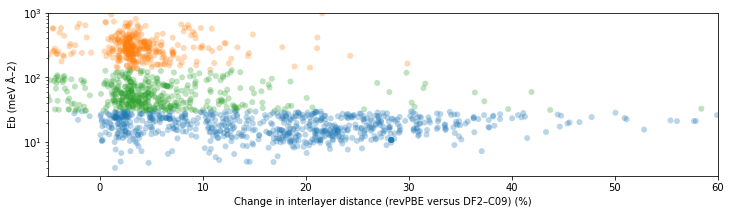

1560


In [144]:
i = 0
color = ['tab:blue',  'tab:green', 'tab:orange']
fig, ax = plt.subplots(figsize=(12, 3))
for key in revpbe.keys():
    if key in binding_energies.keys():
    
        try:
            x = abs(df2[key]['cell'][2][2]-revpbe[key]['cell'][2][2])/df2[key]['cell'][2][2]*100
            y = binding_energies[key]['df2']
            if y <= 30:
                a = plt.scatter(x,y, c = color[0], alpha=0.3, edgecolors='none', label = color[0])
                i = i +1
            elif 30 < y <= 130:
                b = plt.scatter(x,y, c = color[1], alpha=0.3, edgecolors='none', label = color[1])
                i = i +1
            else:
                plt.scatter(x,y, c = color[2], alpha=0.3, edgecolors='none', label = color[2])
                i = i +1
        except KeyError:
            pass
plt.yscale('log')
plt.xlim((-5,60))
plt.ylim((3,1000))
plt.xlabel("Change in interlayer distance (revPBE versus DF2–C09) (%)")
plt.ylabel("Eb (meV Å–2)")
plt.savefig("Fig2C.pdf",bbox_inches='tight',dpi=600)
plt.show()
print(i)

In [25]:
import joblib
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
RF = RandomForestClassifier(n_estimators=600)

In [27]:
loaded_RF = joblib.load("random_forest_model.joblib")

In [28]:
df = pd.read_pickle("features_MultipleFeaturizer.pkl")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,264,265,266,267,268,269,270,271,272,label
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,57.777778,64.0,0.130435,0.217391,0.652174,0.000000,1.0,0.209607,0.046579,EE
1,6.000000,10.432235,4.432235,8.954823,1.969882,0.101871,1.076403,0.847193,1.119514e-11,0.171207,...,73.333333,64.0,0.272727,0.454545,0.272727,0.000000,1.0,0.357395,0.079421,EE
2,9.052693,11.479272,2.426579,9.749345,0.864963,0.020033,1.032994,0.959935,2.631480e-02,0.125121,...,15.750000,152.0,0.129032,0.193548,0.483871,0.193548,0.0,0.168813,0.031652,EE
3,10.187778,12.638871,2.451093,11.821840,1.089375,0.050764,1.038073,0.923854,4.593043e-02,0.102799,...,28.000000,229.0,0.200000,0.000000,0.333333,0.466667,0.0,0.265103,0.058912,PE
4,9.198422,14.426225,5.227803,11.335849,2.060251,0.087363,1.131045,0.914155,9.864448e-02,0.120736,...,65.555556,64.0,0.250000,0.250000,0.500000,0.000000,1.0,0.543070,0.104828,EE


In [29]:
dataframe_df2 = pd.read_pickle("DataFrame_df2.pkl")
dataframe_df2.head()

,uuid,structure,cell,volume,relevant_dimension_of_highest_dimensionality_substructure,binding_energy_per_substructure,binding_energy,label,number_of_atoms_in_bulk,number_of_highest_dimensionality_substructures_in_bulk,sub_structure_spg,sub_structure_dim,energy_bulk,sub_structure_formula,PMG Structure from ASE Atoms
0,dec2d070-d2ad-41f3-b742-786368ade33a,"(Atom('Cd', [-0.0, -0.0, 29.0441583], index=0)...","[[2.1044124705, 1.2149831063, 34.279850741], [...",525.885600,15.340954,-0.165000,10.755509,EE,15,5,"[C2/m (12), C2/m (12), C2/m (12), C2/m (12), C...","[2, 2, 2, 2, 2]",-17198.871453,"[CdI2, CdI2, CdI2, CdI2, CdI2]",[[-7.99325051e-18 -1.35384926e-17 2.90441583e...
1,51e630e8-d94f-421c-bd1e-3e2f298e740c,"(Atom('Fe', [0.0, 0.0, 0.0], index=0), Atom('C...","[[3.35814166734363, 3.21879556184565e-14, -3.2...",52.188194,9.766268,-0.149888,15.347484,EE,3,1,[P-3m1 (164)],[2],-5361.474444,[Cl2Fe],"[[0. 0. 0.] Fe, [7.65128701e-17 2.06980071e+00..."
2,527e7b32-d211-4743-9631-120122819190,"(Atom('Er', [2.1386, 4.301805, 3.209025], inde...","[[2.14789490163679, -12.5878501270869, 0.0], [...",232.520056,18.471785,-0.454048,24.580650,EE,8,1,[P2_1/m (11)],[2],-26090.090963,[Er2Te6],"[[2.1386 4.301805 3.209025] Er, [ 2.1386 -..."
3,37bf14b1-6529-436c-a519-e1ad9b208784,"(Atom('Ba', [0.0, 0.0, 9.5697], index=0), Atom...","[[-2.0745739339, 2.0745739339, 7.4278571834], ...",127.873741,17.215428,-0.747937,43.445746,PE,3,1,[C2/m (12)],[2],-2866.173187,[Ba2Hg],[[-1.10578213e-16 1.10578213e-16 9.56970000e...
4,e7a9cec3-f11a-4d16-a8c5-ebd758bb6592,"(Atom('Ba', [0.0, 2.414, 1.49473], index=0), A...","[[4.6829418165, 0.0, 0.0], [0.0, 4.6829418165,...",166.823529,21.929944,-0.532853,24.297979,EE,6,1,[P4/nmm (129)],[2],-3217.539658,[Ba2H2I2],"[[0. 2.414 1.49473] Ba, [2.414 0. ..."


In [31]:
dataframe_df2['label']

0        EE
1        EE
2        EE
3        PE
4        EE
       ... 
2387    HBE
2388    HBE
2389     EE
2390     PE
2391     PE
Name: label, Length: 2392, dtype: object

In [32]:
df_complete = pd.concat([df, dataframe_df2.drop(['label'], axis = 1 )], axis=1)
print(len(df_complete))
df_complete.head()

2392


,0,1,2,3,4,5,6,7,8,9,...,relevant_dimension_of_highest_dimensionality_substructure,binding_energy_per_substructure,binding_energy,number_of_atoms_in_bulk,number_of_highest_dimensionality_substructures_in_bulk,sub_structure_spg,sub_structure_dim,energy_bulk,sub_structure_formula,PMG Structure from ASE Atoms
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.340954,-0.165000,10.755509,15,5,"[C2/m (12), C2/m (12), C2/m (12), C2/m (12), C...","[2, 2, 2, 2, 2]",-17198.871453,"[CdI2, CdI2, CdI2, CdI2, CdI2]",[[-7.99325051e-18 -1.35384926e-17 2.90441583e...
1,6.000000,10.432235,4.432235,8.954823,1.969882,0.101871,1.076403,0.847193,1.119514e-11,0.171207,...,9.766268,-0.149888,15.347484,3,1,[P-3m1 (164)],[2],-5361.474444,[Cl2Fe],"[[0. 0. 0.] Fe, [7.65128701e-17 2.06980071e+00..."
2,9.052693,11.479272,2.426579,9.749345,0.864963,0.020033,1.032994,0.959935,2.631480e-02,0.125121,...,18.471785,-0.454048,24.580650,8,1,[P2_1/m (11)],[2],-26090.090963,[Er2Te6],"[[2.1386 4.301805 3.209025] Er, [ 2.1386 -..."
3,10.187778,12.638871,2.451093,11.821840,1.089375,0.050764,1.038073,0.923854,4.593043e-02,0.102799,...,17.215428,-0.747937,43.445746,3,1,[C2/m (12)],[2],-2866.173187,[Ba2Hg],[[-1.10578213e-16 1.10578213e-16 9.56970000e...
4,9.198422,14.426225,5.227803,11.335849,2.060251,0.087363,1.131045,0.914155,9.864448e-02,0.120736,...,21.929944,-0.532853,24.297979,6,1,[P4/nmm (129)],[2],-3217.539658,[Ba2H2I2],"[[0. 2.414 1.49473] Ba, [2.414 0. ..."


In [33]:
df_complete['label']

0        EE
1        EE
2        EE
3        PE
4        EE
       ... 
2387    HBE
2388    HBE
2389     EE
2390     PE
2391     PE
Name: label, Length: 2392, dtype: object

In [34]:
dataframe_df2.columns

Index(['uuid', 'structure', 'cell', 'volume',
       'relevant_dimension_of_highest_dimensionality_substructure',
       'binding_energy_per_substructure', 'binding_energy', 'label',
       'number_of_atoms_in_bulk',
       'number_of_highest_dimensionality_substructures_in_bulk',
       'sub_structure_spg', 'sub_structure_dim', 'energy_bulk',
       'sub_structure_formula', 'PMG Structure from ASE Atoms'],
      dtype='object')

In [47]:
df_binary = df_complete.dropna()
df_binary['label'].replace(to_replace='PE', value='EE', inplace=True)
df_binary['label'].replace(to_replace='EE', value=1, inplace=True)
df_binary['label'].replace(to_replace='HBE', value=0, inplace=True)

/Users/mohammad/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [49]:
X = df_binary.drop(['label', 'uuid', 'structure', 'cell', 'volume',
       'relevant_dimension_of_highest_dimensionality_substructure',
       'binding_energy_per_substructure', 'binding_energy',
       'number_of_atoms_in_bulk',
       'number_of_highest_dimensionality_substructures_in_bulk',
       'sub_structure_spg', 'sub_structure_dim', 'energy_bulk',
       'sub_structure_formula', 'PMG Structure from ASE Atoms'], axis = 1).values
y = df_binary['label'].values

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [52]:
pred_RF = loaded_RF.predict(X_test)

In [54]:
print(classification_report(y_test, pred_RF))
print("\n")
print(confusion_matrix(y_test, pred_RF))

              precision    recall  f1-score   support

           0       0.83      0.53      0.65       139
           1       0.89      0.97      0.93       525

    accuracy                           0.88       664
   macro avg       0.86      0.75      0.79       664
weighted avg       0.88      0.88      0.87       664



[[ 74  65]
 [ 15 510]]


In [48]:
df_binary.head()

,0,1,2,3,4,5,6,7,8,9,...,264,265,266,267,268,269,270,271,272,label
1,6.000000,10.432235,4.432235,8.954823,1.969882,0.101871,1.076403,0.847193,1.119514e-11,0.171207,...,73.333333,64.0,0.272727,0.454545,0.272727,0.000000,1.0,0.357395,0.079421,1
2,9.052693,11.479272,2.426579,9.749345,0.864963,0.020033,1.032994,0.959935,2.631480e-02,0.125121,...,15.750000,152.0,0.129032,0.193548,0.483871,0.193548,0.0,0.168813,0.031652,1
3,10.187778,12.638871,2.451093,11.821840,1.089375,0.050764,1.038073,0.923854,4.593043e-02,0.102799,...,28.000000,229.0,0.200000,0.000000,0.333333,0.466667,0.0,0.265103,0.058912,1
4,9.198422,14.426225,5.227803,11.335849,2.060251,0.087363,1.131045,0.914155,9.864448e-02,0.120736,...,65.555556,64.0,0.250000,0.250000,0.500000,0.000000,1.0,0.543070,0.104828,1
5,4.297802,10.295063,5.997261,8.638179,1.860161,0.115771,1.081628,0.729867,6.790509e-02,0.240869,...,71.724490,12.0,0.181818,0.311688,0.324675,0.181818,1.0,0.400240,0.091499,1


In [55]:
pred_RF_complete = loaded_RF.predict(X)

In [56]:
df_binary['prediction'] = pred_RF_complete

/Users/mohammad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [69]:
key in list(df_binary['uuid'])

True

In [75]:
color [int(df_binary [ df_binary['uuid'] == key ]['prediction'])]

'tab:green'

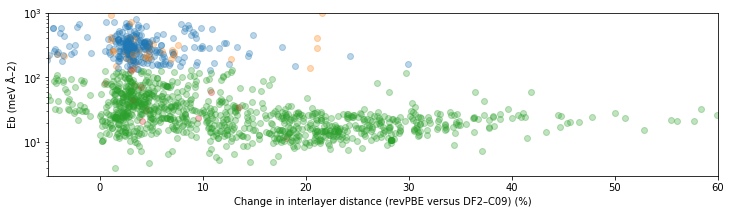

1374


In [143]:
i = 0
color = ['tab:blue',  'tab:red', 'tab:green', 'tab:orange']
fig, ax = plt.subplots(figsize=(12, 3))
for key in revpbe.keys():
    if key in binding_energies.keys():
        if key in list(df_binary['uuid']):
            try:
                x = abs(df2[key]['cell'][2][2]-revpbe[key]['cell'][2][2])/df2[key]['cell'][2][2]*100
                y = binding_energies[key]['df2']
                if int(df_binary [ df_binary['uuid'] == key ]['prediction']) == 1:
                    if int(df_binary [ df_binary['uuid'] == key ]['label']) == 1:
                        color_number = 2
                    else: 
                        color_number = 3
                else:
                    if int(df_binary [ df_binary['uuid'] == key ]['label']) == 0:
                        color_number = 0
                    else: 
                        color_number = 1
                if y <= 30:
                    a = plt.scatter(x,y, c = color[color_number], alpha=0.3, edgecolors='face', label = color[color_number])
                    i = i +1
                elif 30 < y <= 130:
                    b = plt.scatter(x,y, c = color[color_number], alpha=0.3, edgecolors='face', label = color[color_number])
                    i = i +1
                else:
                    plt.scatter(x,y, c = color[color_number], alpha=0.3, edgecolors='face', label = color[color_number])
                    i = i +1
            except KeyError:
                pass
plt.yscale('log')
plt.xlim((-5,60))
plt.ylim((3,1000))
plt.xlabel("Change in interlayer distance (revPBE versus DF2–C09) (%)")
plt.ylabel("Eb (meV Å–2)")
plt.savefig("Figure2C-ML.pdf",bbox_inches='tight',dpi=600)
plt.show()
print(i)

In [121]:
false_negatives = list(df_binary[ df_binary['prediction'] != df_binary['label'] ] [ df_binary[ df_binary['prediction'] != df_binary['label'] ]['prediction'] == 0 ]['structure']) 
false_negatives_uuid = list(df_binary[ df_binary['prediction'] != df_binary['label'] ] [ df_binary[ df_binary['prediction'] != df_binary['label'] ]['prediction'] == 0 ]['uuid']) 

In [122]:
len(false_negatives)

15

In [123]:
import ase
import ase.io

In [128]:
for count, structure in enumerate(false_negatives):
    
    structure.write('False-negatives/{}.cif'.format(false_negatives_uuid[count]))

In [129]:
false_positives = list(df_binary[ df_binary['prediction'] != df_binary['label'] ] [ df_binary[ df_binary['prediction'] != df_binary['label'] ]['prediction'] == 1 ]['structure']) 
false_positives_uuid = list(df_binary[ df_binary['prediction'] != df_binary['label'] ] [ df_binary[ df_binary['prediction'] != df_binary['label'] ]['prediction'] == 1 ]['uuid']) 

In [130]:
len(false_positives_uuid)

65

In [131]:
for count, structure in enumerate(false_positives):
    
    structure.write('False-positives/{}.cif'.format(false_positives_uuid[count]))

In [141]:
df_binary [ df_binary['uuid'] == '87b87e02-8d61-4758-a158-eeb61e601c2b' ][['label', 'prediction']]

,label,prediction
1998,1,0
